In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", sep=';')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [102]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17617,47,blue-collar,divorced,basic.9y,no,yes,yes,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
22486,47,services,married,high.school,unknown,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
34545,27,admin.,married,professional.course,no,no,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
36117,25,admin.,single,university.degree,no,yes,yes,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.270,5099.1,no
6298,43,blue-collar,married,basic.4y,unknown,no,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
df['job']=df['job'].astype('category')
df['marital']=df['marital'].astype('category')
df['education']=df['education'].astype('category')
df['contact']=df['contact'].astype('category')
df['poutcome']=df['poutcome'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')

In [104]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun','jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)


In [105]:
df['y']=df['y'].map({'yes':1, 'no':0}).astype(int)
df['default']=df['default'].astype('category')


In [ ]:
df.info()

In [95]:
df['month'].value_counts()

,count
month,
4,13769
6,7174
7,6178
5,5318
10,4101
3,2632
9,718
8,570
2,546


In [88]:
df.isnull().sum().sum()

np.int64(0)

In [114]:
corr_m

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [113]:
corr_m=df.corr(numeric_only='numbers')
upper = corr_m.where(np.triu(np.ones(corr_m.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_reduced = df.drop(columns=to_drop)

In [115]:
df.groupby(['education']).mean(numeric_only='numbers').T

/tmp/ipython-input-115-692724294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['education']).mean(numeric_only='numbers').T


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
age,47.596504,40.448953,39.061208,37.998213,48.500000,40.080107,38.879191,43.481225
duration,264.827826,264.414485,261.291811,260.886810,276.777778,252.533855,253.223373,262.390526
campaign,2.600575,2.556283,2.532341,2.568576,2.277778,2.586115,2.563527,2.596187
pdays,965.704981,980.368237,979.133168,964.358382,943.833333,960.765974,951.807692,942.830734
previous,0.147031,0.129145,0.141439,0.185917,0.111111,0.163075,0.192390,0.226459
emp.var.rate,0.215924,0.231152,0.159239,0.032937,-0.133333,0.173012,-0.028090,0.059099
cons.price.idx,93.658309,93.650062,93.623399,93.584857,93.317333,93.569864,93.493466,93.658615
cons.conf.idx,-40.239871,-41.127880,-41.326749,-40.940641,-39.950000,-40.124108,-39.975805,-39.877816
euribor3m,3.751768,3.772942,3.697963,3.556157,3.516556,3.710457,3.529663,3.571098
nr.employed,5170.124880,5174.718063,5172.294012,5164.994735,5171.777778,5170.155979,5163.226298,5159.549509


In [90]:
ct=pd.crosstab(df['marital'], df['y'], normalize=True) #analisis bivariado de marital status con la respuesta
ct

y,0,1
marital,,
divorced,0.100418,0.011557
married,0.543751,0.061474
single,0.241527,0.039332
unknown,0.001651,0.000291


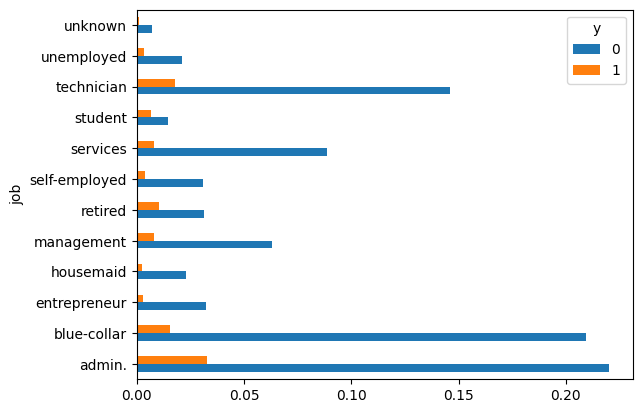

In [91]:
ct=pd.crosstab(df['job'], df['y'], normalize=True).plot.barh(stacked=False)


In [116]:
#balance de clases
categ_columns=['month','day_of_week','job','marital','education','default','housing','loan','contact','poutcome']
for colum in categ_columns:
  print('\n')
  print(df[colum].value_counts(dropna=False, sort=False))



month
jan        0
feb        0
mar      546
apr     2632
may    13769
jun     5318
jul     7174
aug     6178
sep      570
oct      718
nov     4101
dec      182
Name: count, dtype: int64


day_of_week
mon    8514
tue    8090
wed    8134
thu    8623
fri    7827
Name: count, dtype: int64


job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: count, dtype: int64


marital
divorced     4612
married     24928
single      11568
unknown        80
Name: count, dtype: int64


education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: count, dtype: int64


default
no         325

In [117]:
df['duration-log']=np.log(df['duration']+1) #se usa el +1 para evitar indeterminaciones de log(0) en valores cercanos al 0
df['campaign-log']=np.log(df['campaign']+1)
df['previous-log']=np.log(df['previous']+1)

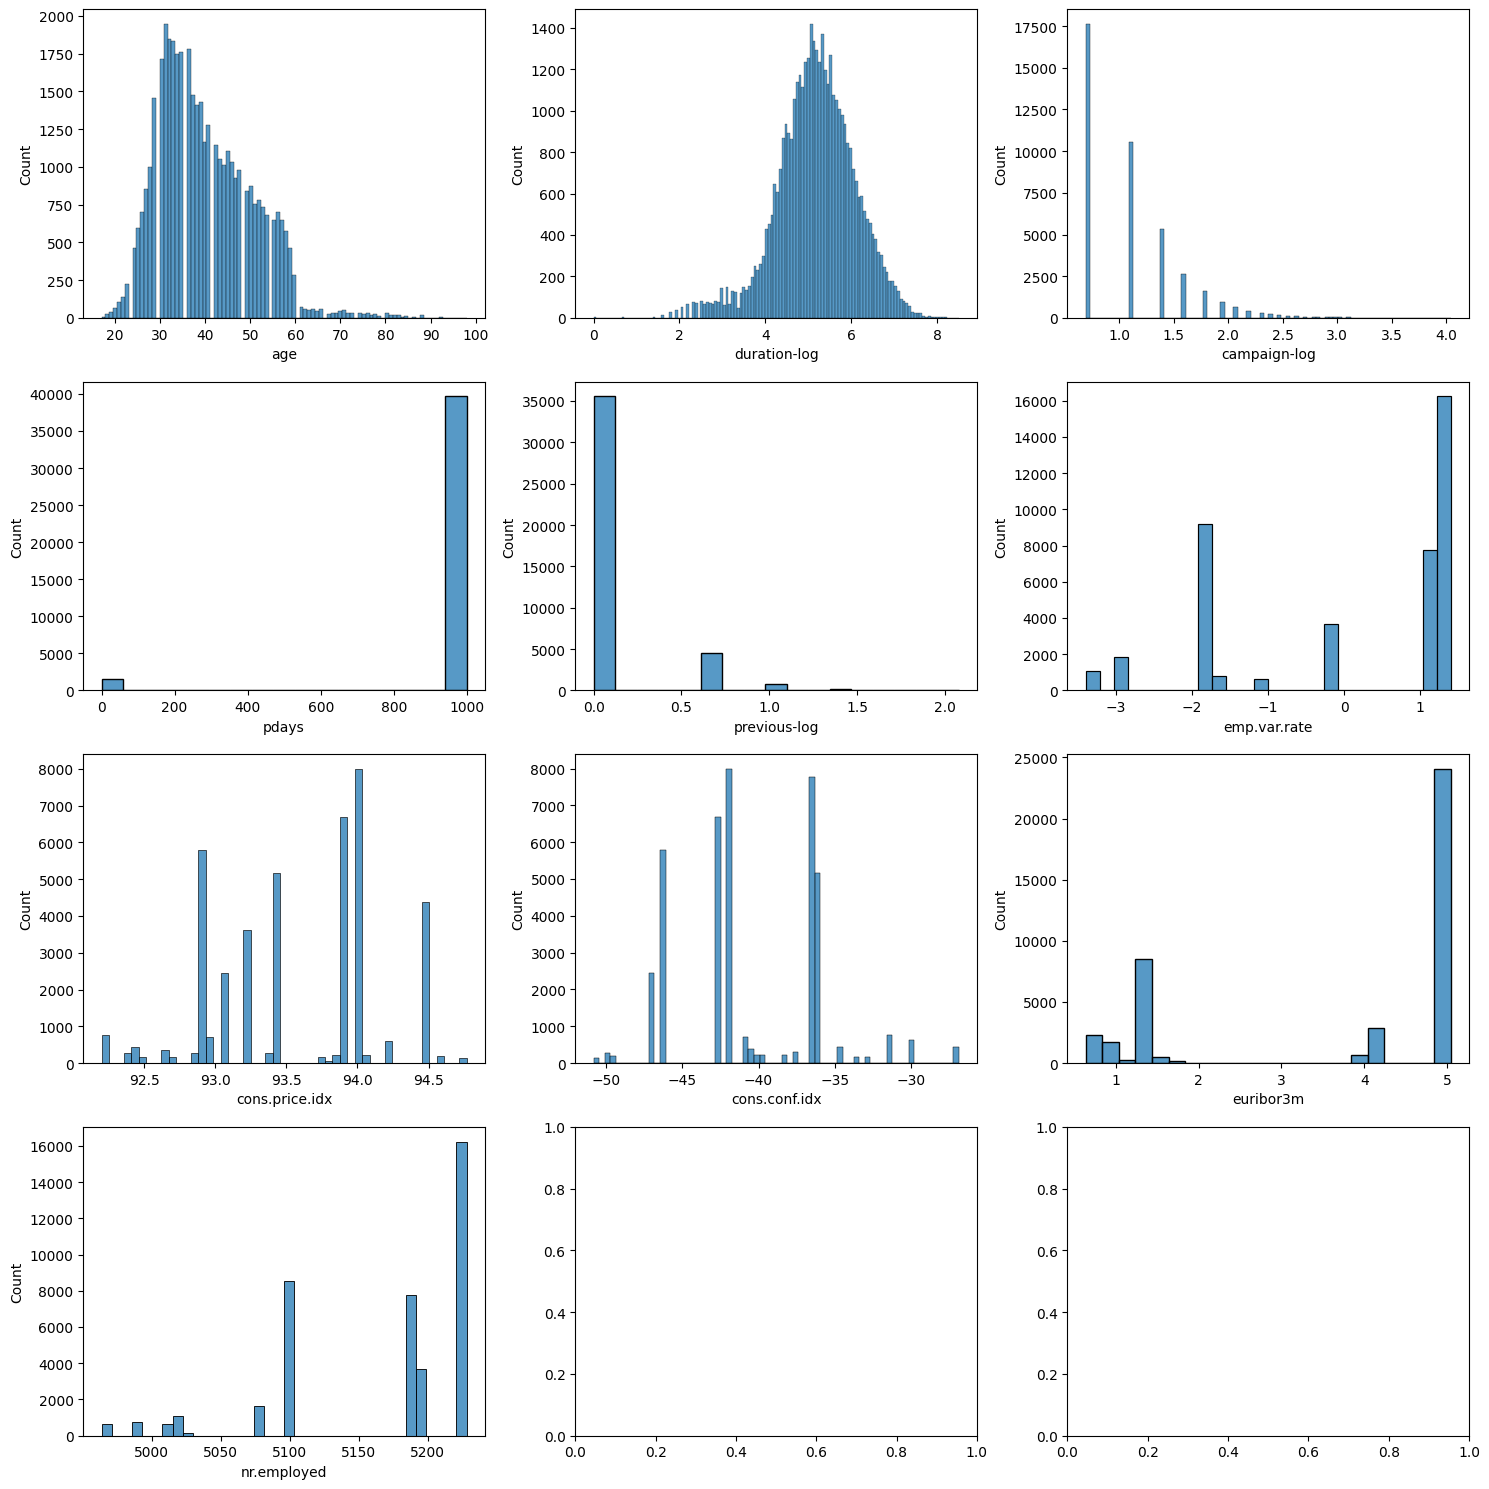

In [118]:
cols_num=['age','duration-log','campaign-log','pdays','previous-log','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
fig, axes=plt.subplots(4,3, figsize=(15,15))
for i, column in enumerate(cols_num):
  sns.histplot(df[column], ax=axes[i//3, i%3], kde=False)
plt.tight_layout()
plt.show()

In [121]:
from sklearn.model_selection import train_test_split

x=df_reduced.drop('y', axis=1)
y=df_reduced['y']
x=pd.get_dummies(x,drop_first=True) #convierte variables categoricas en columnas

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

In [122]:
x_train.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,...,month_sep,month_oct,month_nov,month_dec,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,poutcome_nonexistent,poutcome_success
11196,38,149,1,999,0,1.4,94.465,-41.8,True,False,...,False,False,False,False,False,False,True,False,True,False
15464,51,104,1,999,0,1.4,93.918,-42.7,False,False,...,False,False,False,False,False,False,False,True,True,False
25538,45,770,1,999,0,-0.1,93.200,-42.0,False,False,...,False,False,True,False,False,True,False,False,True,False


In [125]:
#modelo de regresion logistica
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(class_weight={0:0.15,1:0.85}, solver="liblinear")
model.fit(x_train, y_train)
y_pred=model.predict(x_test)


In [127]:
y_pred[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [129]:
z=x_test.copy()
z['y real']=y_test
z['y prediccion']=y_pred
z[['y real', 'y prediccion']].head(40)

,y real,y prediccion
35577,0,0
13950,0,0
29451,1,0
32295,0,0
27477,0,0
31507,0,0
32167,0,0
24580,0,0
2954,0,0
34998,0,0


In [132]:
#matriz de confusion
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0,1]) #nunca se usa el train porque con eso se construyo el modelo
df_cm=pd.DataFrame(cm, index=['Observado 0','Observado 1'], columns=['Prediccion 0','Prediccion 1'])
df_cm

,Prediccion 0,Prediccion 1
Observado 0,9640,1304
Observado 1,249,1164


In [134]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
model_score= accuracy_score(y_test, y_pred)
recall_score= recall_score(y_test, y_pred)
precision_score= precision_score(y_test, y_pred)
f1_score= f1_score(y_test, y_pred)

print('Medidas del modelo')
print('----------------------')
print('Acurracy = {0:0.2f}'.format(model_score)) #num de prediciones correctas
print('Recall= {0:0.2f}'.format(recall_score))  #proporcion de predicciones positivas reales correctas
print('Precision= {0:0.2f}'.format(precision_score)) #proporcion de predicciones positivas correctas
print('F1= {0:0.2f}'.format(f1_score)) #media armonica de recall y presicion
print('Roc auc score= {0:0.2f}'.format(roc_auc_score(y_test, y_pred))) #curva que muestra que tan bueno es el modelo


Medidas del modelo
----------------------
Acurracy = 0.87
Recall= 0.82
Precision= 0.47
F1= 0.60
Roc auc score= 0.85


El modelo tiene mas del 80% de predicciones correctas aunque una presicion de menos del 50%, aun asi podemos decir que es un buen modelado